# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('data/tennis.csv')

#Replace NaNs with Federer's average score

df['player1 total points won'] = df['player1 total points won'].fillna(df['player1 total points won'].mean())
df['player1 total points won'] = df['player1 total points won'].astype("float")

#Get dummies
x = pd.get_dummies(df['surface'], drop_first=True)

In [160]:
X = x
y = df['player1 total points won']
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.866
Model:                                  OLS   Adj. R-squared (uncentered):              0.865
Method:                       Least Squares   F-statistic:                              1514.
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):                        0.00
Time:                              16:35:41   Log-Likelihood:                         -5803.3
No. Observations:                      1179   AIC:                                  1.162e+04
Df Residuals:                          1174   BIC:                                  1.164e+04
Df Model:                                 5                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Clay      86.8695     13.593      6.391      0.000      60.201     113.538
Indoor: Hard      78.4683      2.215     35.430      0.000      74.123      82.814
Outdoor: Clay     87.9265      2.110     41.672      0.000      83.787      92.066
Outdoor: Grass    97.5211      2.814     34.657      0.000      92.000     103.042
Outdoor: Hard     87.5995      1.517     57.763      0.000      84.624      90.575
==============================================================================
Omnibus:                      264.023   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.255
Skew:                           1.283   Prob(JB):                    1.32e-117
Kurtosis:                       5.091   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value.**

- The coefficients suggest the average amount of points Federer will score per match. It can be seen that Federer performs best on Outdoor: Grass surfaces and worst on Indoor: Hard surfaces. In general Federer does better on Outdoor surfaces as can be seen with higher coefficients for Outdoor surfaces compared to indoor. The p-values for each surface suggest that the data is significant and the null hypothesis can be rejected. The same can be said for the prob F-stat as both are less than 0.05.

In [161]:
X = x
X = sm.add_constant(X)
y = df['player1 total points won']
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.041
Model:                                  OLS   Adj. R-squared:                  0.037
Method:                       Least Squares   F-statistic:                     10.12
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):           1.66e-09
Time:                              16:35:43   Log-Likelihood:                -5488.8
No. Observations:                      1179   AIC:                         1.099e+04
Df Residuals:                          1173   BIC:                         1.102e+04
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             84.1384      2.926     28.752      0.000      78.397      89.880
Indoor: Clay       2.7311     10.818      0.252      0.801     -18.494      23.956
Indoor: Hard      -5.6702      3.383     -1.676      0.094     -12.307       0.967
Outdoor: Clay      3.7880      3.343      1.133      0.257      -2.771      10.347
Outdoor: Grass    13.3827      3.635      3.682      0.000       6.251      20.514
Outdoor: Hard      3.4611      3.149      1.099      0.272      -2.716       9.639
==============================================================================
Omnibus:                      203.273   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.574
Skew:                           0.998   Prob(JB):                     3.48e-91
Kurtosis:                       5.120   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?**

- Judging from the r-squared value when a constant is included (0.866 vs 0.041), it is probably better to not include a constant term. When the constant term is included, the coefficients suggest how much better or worse Federer will perform on a given surface compared to the constant points. Furthermore the p-values for a few of the independent variables are larger than 0.05 when a constant term is included.

In [173]:
#3) Do a t-test to find that the largest coefficient is statistically significantly different from the second largest

#Outdoor grass and outdoor clay the largest and second largest coeffs
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html
from scipy import stats

grass_mean = x['Outdoor: Grass'].mean()
grass_std = x['Outdoor: Grass'].std()
clay_mean = x['Outdoor: Clay'].mean()
clay_std = x['Outdoor: Clay'].std()

stats.ttest_ind_from_stats(grass_mean, grass_std, len(x['Outdoor: Grass']),
                           clay_mean, clay_std, len(x['Outdoor: Clay']))

#Extremely small p-value indicates statistical significance

Ttest_indResult(statistic=-6.092719567830354, pvalue=1.2928748476899178e-09)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [175]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


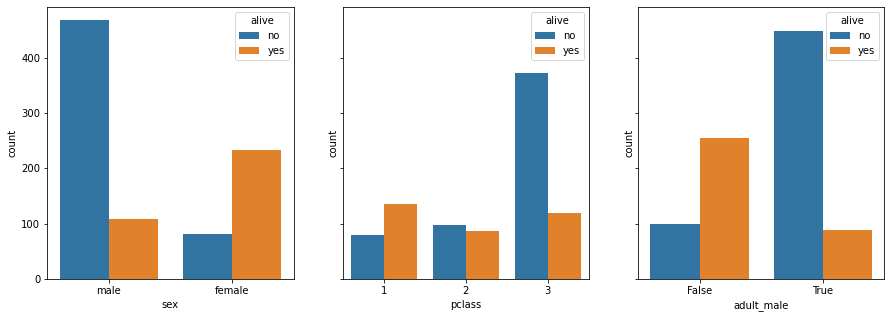

In [176]:
#Assumptions: Women, children and people of higher class are more likely to survive.

fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
sns.countplot(ax=axes[0], x=df['sex'], hue=df['alive'])
sns.countplot(ax=axes[1], x=df['pclass'], hue=df['alive'])
sns.countplot(ax=axes[2], x=df['adult_male'], hue=df['alive'])

'\n- Can see from these plots that class and sex matters\n    - If you are an adult male, goodbye....\n- Would say age matters too but there is the matter of spread per age group present in the Titanic\n'

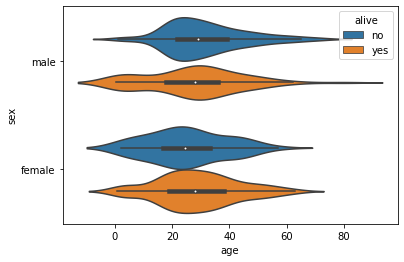

In [177]:
sns.violinplot(x=df['age'], y=df['sex'], hue=df['alive'])

'''
- Can see from these plots that class and sex matters
    - If you are an adult male, goodbye....
- Would say age matters too but there is the matter of spread per age group present in the Titanic
'''

In [178]:
df['sex'] = df['sex'].replace("male", 0).replace("female", 1)
#df['age'].isna().sum()
#df['sex'].isna().sum()
#df['pclass'].isna().sum()

#Replace Nans in the X columns
df['age'] = df['age'].fillna(df['age'].mean())

In [179]:
X = df[['sex', 'age', 'pclass']]
y = df['survived']
x = sm.add_constant(X)

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     183.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.11e-92
Time:                        16:54:25   Log-Likelihood:                -406.57
No. Observations:                 891   AIC:                             821.1
Df Residuals:                     887   BIC:                             840.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7846      0.061     12.850      0.000       0.665       0.904
sex            0.4989      0.027     18.253      0.000       0.445       0.553
age           -0.0050      0.001     -4.750      0.000      -0.007      -0.003
pclass        -0.1852      0.017    -11.222      0.000      -0.218      -0.153
==============================================================================
Omnibus:                       35.683   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.081
Skew:                           0.510   Prob(JB):                     3.26e-09
Kurtosis:                       3.106   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
'''
- Try a new model with child, man and woman of each cabin class
- This allows to separate between age more easily as the categories "man", "woman" and "child" are already defined
'''

df['who_class'] = df['who'].astype(str) + ' ' + df['class'].astype(str)
set(list(df['who_class']))

{'child First',
 'child Second',
 'child Third',
 'man First',
 'man Second',
 'man Third',
 'woman First',
 'woman Second',
 'woman Third'}

In [219]:
y = df['survived']
X = pd.get_dummies(df['who_class'])
x = sm.add_constant(X)

est = sm.OLS(y, x).fit()
est.summary()


#  Better r-squared, AIC and BIC with this model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     85.04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.78e-104
Time:                        17:14:06   Log-Likelihood:                -367.24
No. Observations:                 891   AIC:                             752.5
Df Residuals:                     882   BIC:                             795.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5196      0.020     26.131      0.000       0.481       0.559
child First      0.3138      0.136      2.314      0.021       0.048       0.580
child Second     0.4804      0.078      6.164      0.000       0.327       0.633
child Third     -0.0885      0.047     -1.864      0.063      -0.182       0.005
man First       -0.1666      0.036     -4.617      0.000      -0.237      -0.096
man Second      -0.4387      0.039    -11.385      0.000      -0.514      -0.363
man Third       -0.4004      0.027    -14.785      0.000      -0.454      -0.347
woman First      0.4585      0.040     11.530      0.000       0.380       0.537
woman Second     0.3895      0.045      8.645      0.000       0.301       0.478
woman Third     -0.0283      0.037     -0.773      0.440      -0.100       0.044
==============================================================================
Omnibus:                       83.073   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.478
Skew:                           0.810   Prob(JB):                     2.06e-23
Kurtosis:                       3.432   Cond. No.                     9.60e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [182]:
'''
- Try another model with:
    - Parch (take family sizes into account as a variable)
    - Fare (class division already accounted for but check with this to see for more nuance)
'''
# df2 = df.merge(X, left_index=True, right_index=True)
df2 = X.merge(df[['fare', 'parch']], left_index=True, right_index=True)
df2.head()

,child First,child Second,child Third,man First,man Second,man Third,woman First,woman Second,woman Third,fare,parch
0,0,0,0,0,0,1,0,0,0,7.2500,0
1,0,0,0,0,0,0,1,0,0,71.2833,0
2,0,0,0,0,0,0,0,0,1,7.9250,0
3,0,0,0,0,0,0,1,0,0,53.1000,0
4,0,0,0,0,0,1,0,0,0,8.0500,0


In [184]:
y = df['survived']
X = df2
x = sm.add_constant(X)

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     70.19
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          5.45e-105
Time:                        16:55:10   Log-Likelihood:                -360.71
No. Observations:                 891   AIC:                             743.4
Df Residuals:                     880   BIC:                             796.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5475      0.025     21.751      0.000       0.498       0.597
child First      0.3604      0.139      2.597      0.010       0.088       0.633
child Second     0.5237      0.079      6.669      0.000       0.370       0.678
child Third     -0.0474      0.049     -0.967      0.334      -0.143       0.049
man First       -0.1991      0.038     -5.278      0.000      -0.273      -0.125
man Second      -0.4640      0.040    -11.704      0.000      -0.542      -0.386
man Third       -0.4236      0.029    -14.407      0.000      -0.481      -0.366
woman First      0.4262      0.045      9.467      0.000       0.338       0.515
woman Second     0.3869      0.045      8.537      0.000       0.298       0.476
woman Third     -0.0155      0.038     -0.413      0.680      -0.089       0.058
fare             0.0003      0.000      0.890      0.374      -0.000       0.001
parch           -0.0629      0.017     -3.606      0.000      -0.097      -0.029
==============================================================================
Omnibus:                       82.659   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.966
Skew:                           0.800   Prob(JB):                     2.65e-23
Kurtosis:                       3.488   Cond. No.                     5.94e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [197]:
#Try dropping columns with high p-value

y = df['survived']
X = df2.drop(columns=['child Third', 'woman Third', 'fare'])
x = sm.add_constant(X)

est = sm.OLS(y, x).fit()
est.summary()

# r-squared value is lower by 0.001 but the AIC and BIC are better.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     87.69
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.05e-106
Time:                        17:01:43   Log-Likelihood:                -361.25
No. Observations:                 891   AIC:                             740.5
Df Residuals:                     882   BIC:                             783.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5241      0.031     16.646      0.000       0.462       0.586
child First      0.4196      0.152      2.754      0.006       0.121       0.719
child Second     0.5519      0.088      6.242      0.000       0.378       0.725
man First       -0.1570      0.045     -3.503      0.000      -0.245      -0.069
man Second      -0.4354      0.048     -9.127      0.000      -0.529      -0.342
man Third       -0.3973      0.037    -10.813      0.000      -0.469      -0.325
woman First      0.4790      0.048      9.996      0.000       0.385       0.573
woman Second     0.4151      0.053      7.801      0.000       0.311       0.519
parch           -0.0602      0.017     -3.605      0.000      -0.093      -0.027
==============================================================================
Omnibus:                       82.482   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.671
Skew:                           0.800   Prob(JB):                     3.08e-23
Kurtosis:                       3.481   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2.1 Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did**

- Choosing to go with the third model as it gives as good a r-squared value as the second model (off by 0.001) but more so due to better values for the prob F-stat, AIC and BIC values

**2.2 Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?**

- Judging from the coeffs, adult males died more overall compared to women and children but more men from first class cabins survived compared to second and third class. In terms of real-world interpretation, it can be clearly seen that the code of conduct of "women and children first" during life threatening situations has been followed and also generally can be seen that people from higher class cabins fared better.

In [204]:
#2.3) Regularized regression model using who_class and family sizes

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

clf = Ridge(alpha=1.0)
clf.fit(X, y)
regularized_prediction = clf.predict(X)

r_squared = r2_score(y, regularized_prediction)
r_squared

#R-squared value more or less the same as a non-regularized model so this does not really improve it

0.442785266874537

Text(0, 0.5, 'regularized prediction')

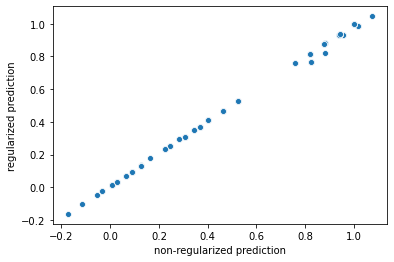

In [217]:
#Plotting non-regularized vs regularized prediction

ols_prediction = est.predict(x)

sns.scatterplot(ols_prediction, regularized_prediction)
plt.xlabel("non-regularized prediction")
plt.ylabel("regularized prediction")

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [434]:
#DATA PRE-PROCESSING

df = pd.read_csv('data/house_price.csv')

#remove columns with too many nans
df = df.loc[:, df.isnull().mean() < .45] 

#Separate between categorical and numeric columns
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
numeric_features = [i for i in df.columns if df.dtypes[i]!='object']

#Make new df for categorical features and then use get dummies to one hot encode
df2_cat = df[cat_features]
df_cat = pd.get_dummies(df2)

#Get the merge going with numeric features
df_num = df[numeric_features]
df_processed = df_num.merge(df_cat, left_index=True, right_index=True)
df_processed = df_processed.set_index('Id')

#Take care of Nans
# df_processed.columns[df_processed.isnull().any()]
df_processed['LotFrontage'] = df_processed['LotFrontage'].fillna(df_processed['LotFrontage'].mean())
df_processed['MasVnrArea'] = df_processed['MasVnrArea'].fillna(df_processed['MasVnrArea'].mean())
df_processed['GarageYrBlt'] = df_processed['GarageYrBlt'].fillna(df_processed['GarageYrBlt'].mean())

This dataset has way too many x variables so the plan is to use the chi-squared filter based method to select features which are highly dependent on the response. After the pre-processing, I decided to select the top 75 features out of 270 (approximately a quarter of the x variables)

In [436]:
#https://www.youtube.com/watch?v=fMIwIKLGke0 - Chi-Squared For Feature Selection using SelectKBest
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
#https://www.geeksforgeeks.org/ml-chi-square-test-for-feature-selection/

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X = df_processed.drop(columns=['SalePrice'])
y = df_processed['SalePrice']
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=75)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_features = X.loc[:,chi_support].columns.tolist()

In [437]:
#Regression
X = df_processed[chi_features]
y = df_processed['SalePrice']
x = sm.add_constant(X)

est = sm.OLS(y, x).fit()
est.summary()

#Decent r-squared value and good prob f-stat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     54.24
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:05:46   Log-Likelihood:                -17543.
No. Observations:                1460   AIC:                         3.524e+04
Df Residuals:                    1384   BIC:                         3.564e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.359e+05   1797.694     75.586      0.000    1.32e+05    1.39e+05
MSZoning_C (all)       -3.22e+04   1.55e+04     -2.082      0.038   -6.25e+04   -1858.693
MSZoning_FV           -1.425e+04   1.09e+04     -1.306      0.192   -3.57e+04    7152.976
Street_Grvl           -1.814e+04   1.82e+04     -0.997      0.319   -5.38e+04    1.75e+04
LotShape_IR3          -5794.3050   1.38e+04     -0.419      0.675   -3.29e+04    2.13e+04
LandContour_HLS        3121.1110   6731.413      0.464      0.643   -1.01e+04    1.63e+04
LotConfig_CulDSac      1.697e+04   4634.529      3.661      0.000    7876.268    2.61e+04
LotConfig_FR2         -1.721e+04   6294.656     -2.734      0.006   -2.96e+04   -4860.903
LotConfig_FR3         -2.158e+04   2.08e+04     -1.035      0.301   -6.25e+04    1.93e+04
LandSlope_Mod          9324.3126   5880.560      1.586      0.113   -2211.461    2.09e+04
LandSlope_Sev          2.304e+04   1.33e+04      1.727      0.084   -3132.772    4.92e+04
Neighborhood_Blmngtn  -6756.7559   1.08e+04     -0.626      0.532   -2.79e+04    1.44e+04
Neighborhood_CollgCr   2.019e+04   4219.424      4.785      0.000    1.19e+04    2.85e+04
Neighborhood_Crawfor   4.594e+04   6348.538      7.236      0.000    3.35e+04    5.84e+04
Neighborhood_Gilbert   1.389e+04   5557.298      2.499      0.013    2988.470    2.48e+04
Neighborhood_IDOTRR   -1.245e+04   8347.030     -1.492      0.136   -2.88e+04    3920.819
Neighborhood_MeadowV   -6.47e+04   1.24e+04     -5.234      0.000   -8.89e+04   -4.05e+04
Neighborhood_NoRidge   1.309e+05   7376.831     17.738      0.000    1.16e+05    1.45e+05
Neighborhood_NridgHt   5.701e+04   6687.800      8.524      0.000    4.39e+04    7.01e+04
Neighborhood_Somerst   3.757e+04   1.03e+04      3.661      0.000    1.74e+04    5.77e+04
Neighborhood_StoneBr   5.994e+04   9506.264      6.305      0.000    4.13e+04    7.86e+04
Neighborhood_Timber    3.174e+04   7535.885      4.212      0.000     1.7e+04    4.65e+04
Neighborhood_Veenker   1.987e+04   1.35e+04      1.473      0.141   -6595.979    4.63e+04
Condition1_PosN        3.235e+04   1.03e+04      3.146      0.002    1.22e+04    5.25e+04
Condition1_RRAn        7771.4782   8449.337      0.920      0.358   -8803.413    2.43e+04
Condition2_PosN       -1.451e+05    3.2e+04     -4.528      0.000   -2.08e+05   -8.22e+04
Condition2_RRAn         372.1482   4.17e+04      0.009      0.993   -8.14e+04    8.22e+04
Condition2_RRNn       -2.444e+04   2.97e+04     -0.822      0.411   -8.28e+04    3.39e+04
HouseStyle_1.5Unf     -1.818e+04   1.14e+04     -1.591      0.112   -4.06e+04    4230.846
HouseStyle_2.5Fin      3.726e+04   1.51e+04      2.461      0.014    7560.005     6.7e+04
RoofStyle_Gambrel      1.506e+04   1.29e+04      1.171      0.242   -1.02e+04    4.03e+04
RoofMatl_Membran       